In [1]:
#Importing the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import regex as re
import math
from tabulate import tabulate
from sklearn import metrics

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.feature_selection import mutual_info_classif

In [3]:
import warnings
warnings.simplefilter(action = 'ignore', category= FutureWarning)
warnings.filterwarnings('ignore')

In [4]:
#read the train csv dataset
train_data = pd.read_csv("loan_sanction_train.csv")
train_data.info()
train_data.columns
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#read the test csv dataset
test_data = pd.read_csv("loan_sanction_test.csv")
test_data.info()
test_data.columns
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
# checking the dimension of the data set
train_data.shape,test_data.shape

((614, 13), (367, 12))

In [7]:
#checking duplicate values if present in the data
duplicate_rowstr = train_data[train_data.duplicated()]
print("Number of duplicate rows in train data :: ", duplicate_rowstr.shape)
duplicate_rowste = test_data[test_data.duplicated()]
print("Number of duplicate rows in test data :: ", duplicate_rowste.shape)

Number of duplicate rows in train data ::  (0, 13)
Number of duplicate rows in test data ::  (0, 12)


In [8]:
# remove unimportant features from the data
train_data.drop(['Loan_ID'],axis=1,inplace=True)
train_data.info()
test_data.drop(['Loan_ID'],axis=1,inplace=True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  --

In [9]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Text(0.5, 0, 'LoanAmount')

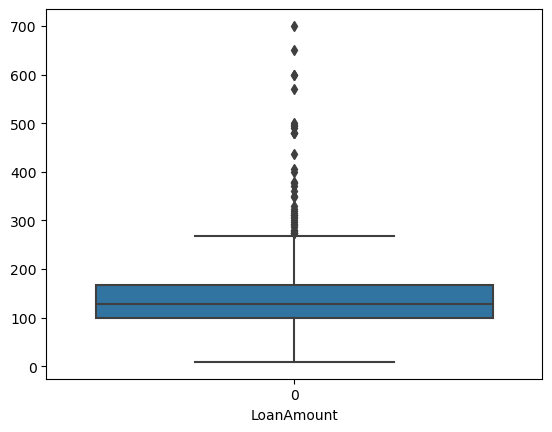

In [10]:
# Ploting boxplot for the features having null value to check its distribution
sns.boxplot(train_data.LoanAmount)
plt.xlabel('LoanAmount')

Text(0.5, 0, 'ApplicantIncome')

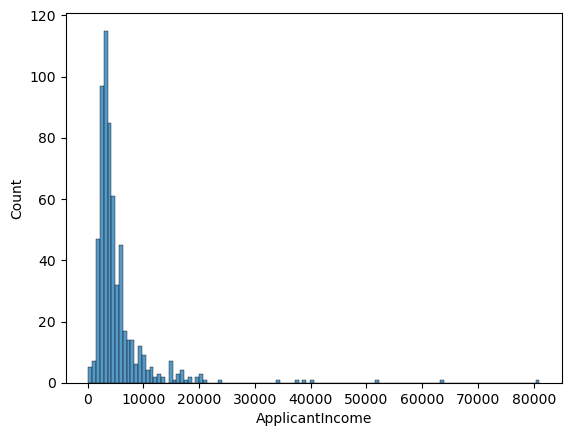

In [11]:
sns.histplot(train_data.ApplicantIncome)
plt.xlabel('ApplicantIncome')

Text(0.5, 0, 'Loan_Amount_Term')

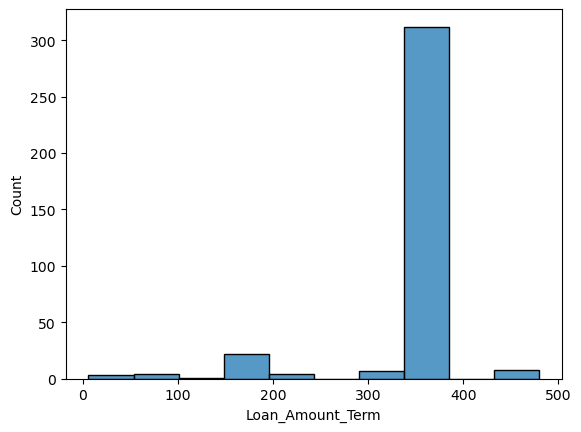

In [12]:
sns.histplot(test_data.Loan_Amount_Term)
plt.xlabel('Loan_Amount_Term')

Text(0.5, 0, 'CoapplicantIncome')

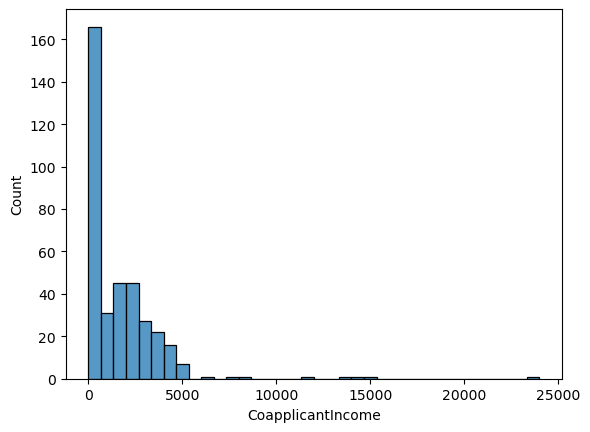

In [13]:
sns.histplot(test_data.CoapplicantIncome)
plt.xlabel('CoapplicantIncome')

In [14]:
round((train_data.isna().sum()*100/614),2)

Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [15]:
round((test_data.isna().sum()*100/367),2)

Gender               3.00
Married              0.00
Dependents           2.72
Education            0.00
Self_Employed        6.27
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           1.36
Loan_Amount_Term     1.63
Credit_History       7.90
Property_Area        0.00
dtype: float64

In [16]:
# Replacing the null values of the quantitative variable with column median
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(),inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0],inplace=True)

test_data['LoanAmount'].fillna(train_data['LoanAmount'].median(),inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0],inplace=True)

In [17]:
train_data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
test_data.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64

In [19]:
cat_columns=[x for x in train_data.dtypes.index if train_data.dtypes[x]=='object']
cat_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [20]:
# frequencies of the categories
for col in cat_columns:
    print('frequency of categories for variable')
    print(train_data[col].value_counts())

frequency of categories for variable
Male      489
Female    112
Name: Gender, dtype: int64
frequency of categories for variable
Yes    398
No     213
Name: Married, dtype: int64
frequency of categories for variable
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
frequency of categories for variable
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
frequency of categories for variable
No     500
Yes     82
Name: Self_Employed, dtype: int64
frequency of categories for variable
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
frequency of categories for variable
Y    422
N    192
Name: Loan_Status, dtype: int64


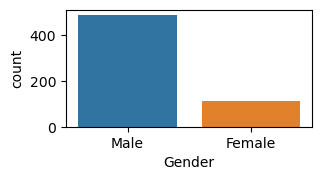

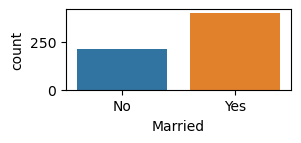

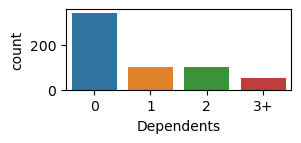

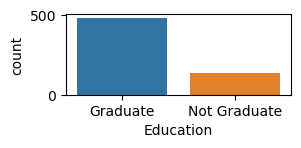

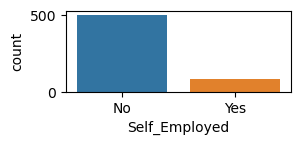

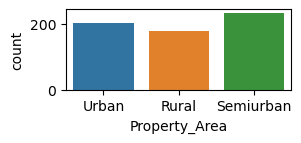

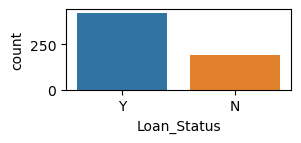

In [21]:
plt.figure(figsize=(7,7))
for i, col in enumerate(cat_columns):
    plt.subplot(4,2,i+1)
    sns.countplot(train_data,x=col)
    plt.show()

<Axes: xlabel='Loan_Status', ylabel='count'>

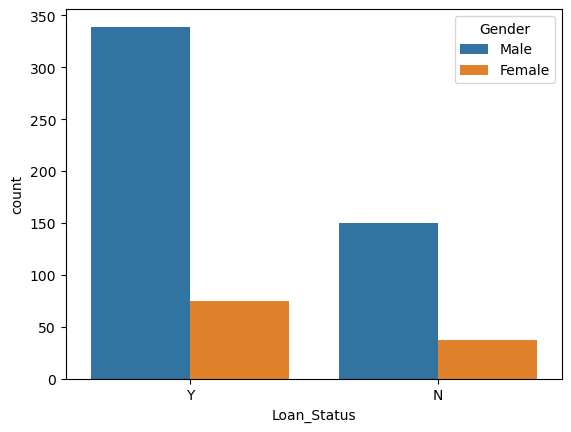

In [22]:
sns.countplot(train_data,x='Loan_Status', hue='Gender')

<Axes: xlabel='Loan_Status', ylabel='count'>

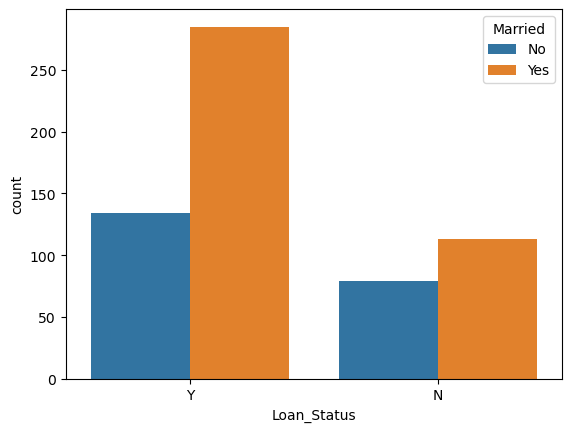

In [23]:
sns.countplot(train_data,x='Loan_Status', hue='Married')

<Axes: xlabel='Loan_Status', ylabel='count'>

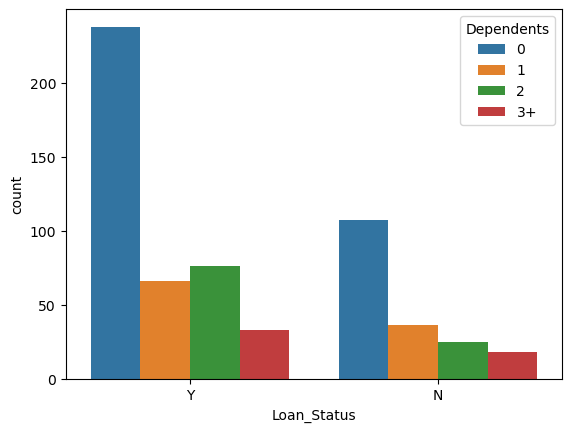

In [24]:
sns.countplot(train_data,x='Loan_Status', hue='Dependents')

<Axes: xlabel='Loan_Status', ylabel='count'>

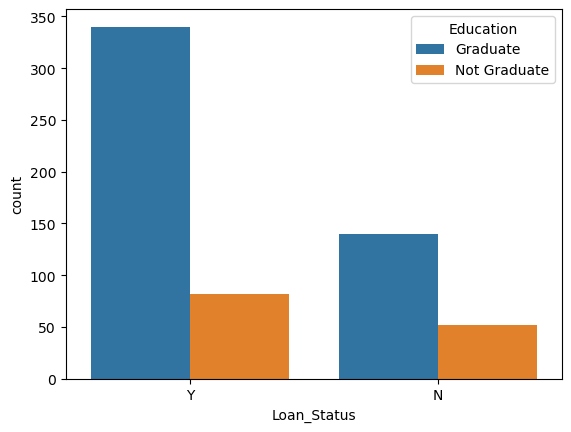

In [25]:
sns.countplot(train_data,x='Loan_Status', hue='Education')

<Axes: xlabel='Loan_Status', ylabel='count'>

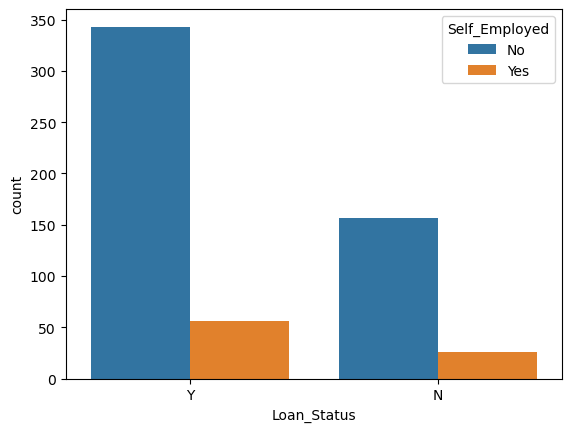

In [26]:
sns.countplot(train_data,x='Loan_Status', hue='Self_Employed')

<Axes: xlabel='Loan_Status', ylabel='count'>

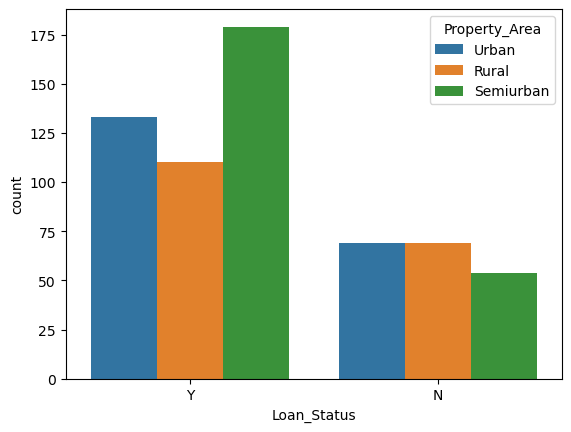

In [27]:
sns.countplot(train_data,x='Loan_Status', hue='Property_Area')

In [28]:
# replacing null values of the catagorical variables with mode values 
train_data['Gender'].fillna(train_data['Gender'].mode()[0],inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0],inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0],inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0],inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0],inplace=True)

test_data['Gender'].fillna(train_data['Gender'].mode()[0],inplace=True)
test_data['Married'].fillna(train_data['Married'].mode()[0],inplace=True)
test_data['Dependents'].fillna(train_data['Dependents'].mode()[0],inplace=True)
test_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0],inplace=True)
test_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0],inplace=True)

In [29]:
train_data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [30]:
test_data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [31]:
# changing the categorical variable in train dataset
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_cat =train_data[cat_columns].apply(le.fit_transform)
data_numeric=train_data.drop(columns=cat_columns)
train_data = pd.concat([data_cat,data_numeric],axis=1,ignore_index=False)
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,1,5849,0.0,128.0,360.0,1.0
1,1,1,1,0,0,0,0,4583,1508.0,128.0,360.0,1.0
2,1,1,0,0,1,2,1,3000,0.0,66.0,360.0,1.0
3,1,1,0,1,0,2,1,2583,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,2,1,6000,0.0,141.0,360.0,1.0


In [32]:
# changing the categorical variable in test dataset
data_cat1 =test_data[['Gender','Married','Dependents','Education','Self_Employed','Property_Area']].apply(le.fit_transform)
data_numeric1=test_data.drop(columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area'])
test_data = pd.concat([data_cat1,data_numeric1],axis=1,ignore_index=False)
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,1,0,0,0,2,5720,0,110.0,360.0,1.0
1,1,1,1,0,0,2,3076,1500,126.0,360.0,1.0
2,1,1,2,0,0,2,5000,1800,208.0,360.0,1.0
3,1,1,2,0,0,2,2340,2546,100.0,360.0,1.0
4,1,0,0,1,0,2,3276,0,78.0,360.0,1.0


                     Gender   Married  Dependents  Education  Self_Employed  \
Gender             1.000000  0.364569    0.172914   0.045364      -0.000525   
Married            0.364569  1.000000    0.334216   0.012304       0.004489   
Dependents         0.172914  0.334216    1.000000   0.055752       0.056798   
Education          0.045364  0.012304    0.055752   1.000000      -0.010383   
Self_Employed     -0.000525  0.004489    0.056798  -0.010383       1.000000   
Property_Area     -0.025752  0.004257   -0.000244  -0.065243      -0.030860   
Loan_Status        0.017987  0.091478    0.010118  -0.085884      -0.003700   
ApplicantIncome    0.058809  0.051708    0.118202  -0.140760       0.127180   
CoapplicantIncome  0.082912  0.075948    0.030430  -0.062290      -0.016100   
LoanAmount         0.106904  0.146546    0.163103  -0.168759       0.115100   
Loan_Amount_Term  -0.074030 -0.100912   -0.103864  -0.073928      -0.033739   
Credit_History     0.009170  0.010938   -0.040160  -

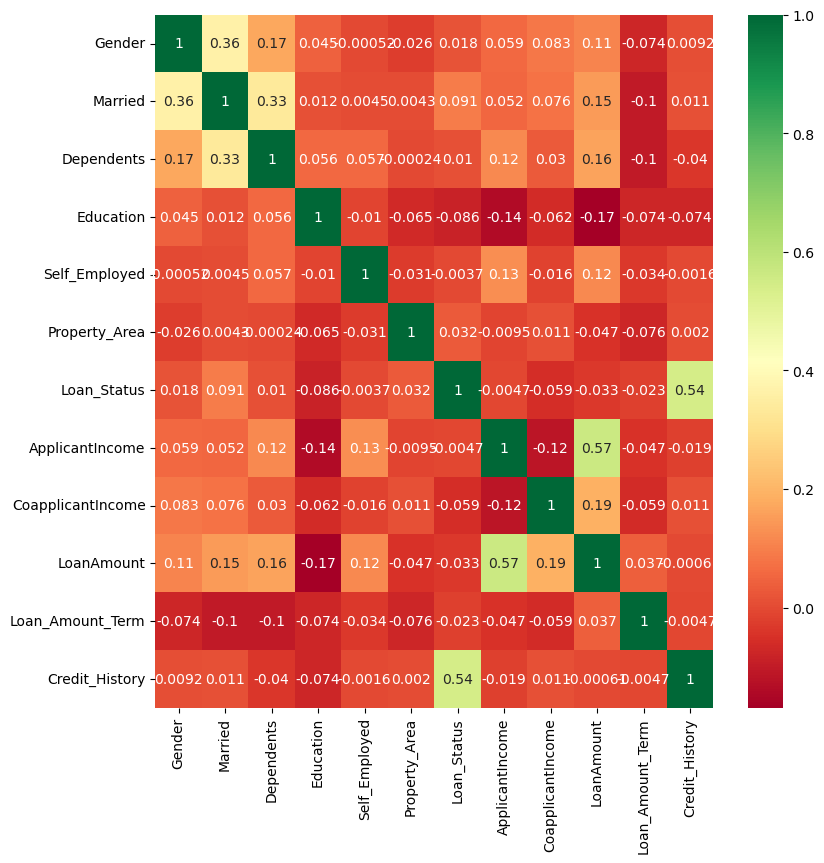

In [33]:
# correlation of each feature in dataset
# plot heat map
corrmat = train_data.corr()
print(corrmat)
top_corr_features = corrmat.index
print(top_corr_features)
plt.figure(figsize=(9,9))
g=sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [34]:
# To check whether the dataset is balaced or not
train_data.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [35]:
from sklearn.utils import resample

#To keep original data as it is to use the same for later
new_data = train_data.copy()

#Getting seperated data with 1 and 0 status.
df_majority = new_data[new_data.Loan_Status==1]
df_minority = new_data[new_data.Loan_Status==0]

#Here we are upsampling the Minority Class Data Points. 
#i.e. We will get equal amount of datapoint as Majority class from Minority class
df_monority_upsampled = resample(df_minority,replace=True,n_samples=422,random_state=123)
df_upsampled = pd.concat([df_majority,df_monority_upsampled])
print("Upsampled data:\n",df_upsampled.Loan_Status.value_counts())

Upsampled data:
 1    422
0    422
Name: Loan_Status, dtype: int64


In [36]:
# spliting the predictor variable and the explanatory variables from train dataset 
X = df_upsampled.drop(columns='Loan_Status')
y = df_upsampled['Loan_Status']
X.shape, y.shape

((844, 11), (844,))

In [37]:
# We split the data into training and validation(testing) set:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((675, 11), (675,), (169, 11), (169,))

In [38]:
# converting the categorical variables into array of the numerical data in train dataset
from sklearn.preprocessing import OneHotEncoder

cat_cols =['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Credit_History']
ohc = OneHotEncoder(handle_unknown='ignore')
ohc.fit(np.array(X_train[cat_cols]))
X_train_ohc = ohc.transform(np.array(X_train[cat_cols])).toarray()
X_test_ohc = ohc.transform(np.array(X_test[cat_cols])).toarray()
X_train_ohc.shape, X_test_ohc.shape

((675, 17), (169, 17))

In [39]:
# converting the categorical variables into array of the numerical data in test dataset
ohc.fit(np.array(test_data[cat_cols]))
test_data_ohc = ohc.transform(np.array(test_data[cat_cols])).toarray()

In [40]:
# standardizing the numerical data features in train and test dataset respectively
from sklearn.preprocessing import StandardScaler

cols_lst = list(train_data.columns)
cols_lst.remove('Loan_Status')
for col in cat_cols:
    cols_lst.remove(col)
numerical_cols = cols_lst
scaler = StandardScaler()
scaler.fit(X_train[numerical_cols])
X_train_std = scaler.transform(X_train[numerical_cols])
X_test_std = scaler.transform(X_test[numerical_cols])

test_data_std = scaler.transform(test_data[numerical_cols])

X_train_std.shape, X_test_std.shape, test_data_std.shape

((675, 4), (169, 4), (367, 4))

In [41]:
X_train = pd.concat([pd.DataFrame(X_train_ohc),pd.DataFrame(X_train_std)],axis=1,ignore_index=True)
X_test = pd.concat([pd.DataFrame(X_test_ohc),pd.DataFrame(X_test_std)],axis=1,ignore_index=True)

test_data = pd.concat([pd.DataFrame(test_data_ohc),pd.DataFrame(test_data_std)],axis=1,ignore_index=True)

X_train.shape, X_test.shape, test_data.shape

((675, 21), (169, 21), (367, 21))

In [42]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-0.291236,-0.478949,-0.799299,-4.381794
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,-0.392401,0.060040,-0.111639,-2.312379
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,-0.376057,-0.047595,0.266575,0.274389
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,-0.254373,-0.478949,-0.421086,-2.312379
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.890291,-0.478949,-1.257740,0.274389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,-0.444773,-0.274008,-0.638845,1.998901
671,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.446025,-0.478949,0.427029,0.274389
672,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.401766,-0.478949,0.404107,0.274389
673,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,-0.426878,-0.478949,-1.028519,0.274389


In [43]:
# Logistic Regression(LR) 
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
clf = lr.fit(X_train,y_train)
predictions_lr = clf.predict(X_test)
predictions_lr

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

              precision    recall  f1-score   support

           0       0.78      0.51      0.61        85
           1       0.63      0.86      0.73        84

    accuracy                           0.68       169
   macro avg       0.71      0.68      0.67       169
weighted avg       0.71      0.68      0.67       169



[Text(50.722222222222214, 0.5, 'Actual Values'),
 Text(0.5, 23.52222222222222, 'Predicted Values')]

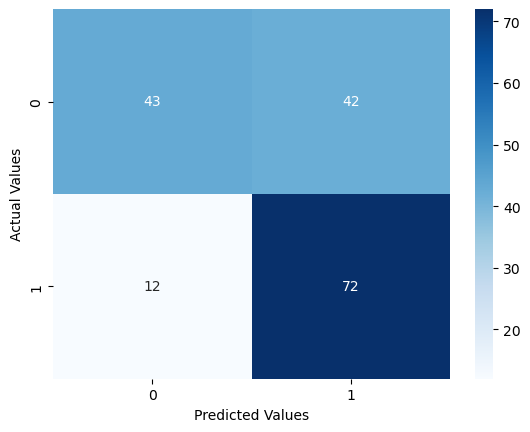

In [44]:
#Classification Results
print(classification_report(y_test,predictions_lr))
ax = sns.heatmap(confusion_matrix(y_test,predictions_lr,labels=[0,1]),cmap='Blues',annot=True,xticklabels=[0,1],yticklabels=[0,1])
ax.set(ylabel="Actual Values", xlabel="Predicted Values")

              precision    recall  f1-score   support

           0       0.88      0.45      0.59        85
           1       0.63      0.94      0.75        84

    accuracy                           0.69       169
   macro avg       0.76      0.69      0.67       169
weighted avg       0.76      0.69      0.67       169



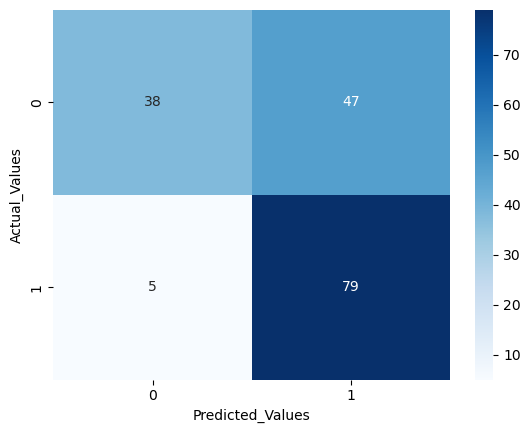

In [44]:
# Naive Bayes(NB) 
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train,y_train)
predictions_bnb = bnb.predict(X_test)

print(classification_report(y_test,predictions_bnb))
ax = sns.heatmap(confusion_matrix(y_test,predictions_bnb,labels=[0,1]),annot=True,cmap='Blues',xticklabels=[0,1],yticklabels=[0,1])
ax.set(xlabel='Predicted_Values',ylabel='Actual_Values')
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.38      0.55        85
           1       0.61      1.00      0.76        84

    accuracy                           0.69       169
   macro avg       0.81      0.69      0.65       169
weighted avg       0.81      0.69      0.65       169



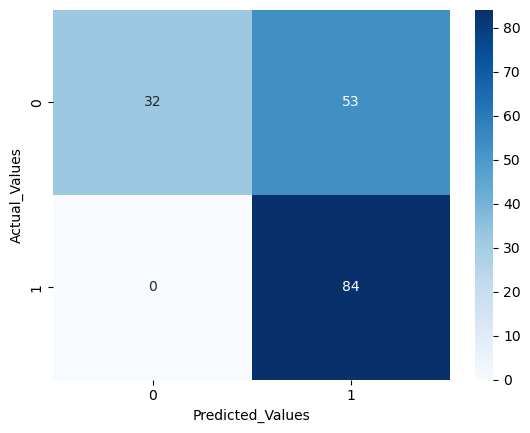

In [45]:
# Support Vector Machine(SVM)
from sklearn.svm import SVC

svm = SVC(kernel="linear",class_weight="balanced",probability=True)
svm.fit(X_train,y_train)
predictions_svm = svm.predict(X_test)

print(classification_report(y_test,predictions_svm))
ax = sns.heatmap(confusion_matrix(y_test,predictions_svm,labels=[0,1]),annot=True,cmap='Blues',xticklabels=[0,1],yticklabels=[0,1])
ax.set(xlabel='Predicted_Values',ylabel='Actual_Values')
plt.show()

              precision    recall  f1-score   support

           0       0.73      0.56      0.64        85
           1       0.64      0.79      0.71        84

    accuracy                           0.67       169
   macro avg       0.68      0.68      0.67       169
weighted avg       0.68      0.67      0.67       169



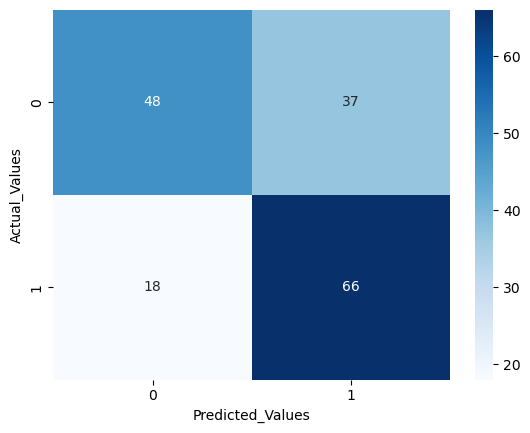

In [45]:
# ADA Boost Classifier
from sklearn.ensemble import AdaBoostClassifier 

ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
predictions_ada = ada.predict(X_test)

print(classification_report(y_test,predictions_ada))
ax = sns.heatmap(confusion_matrix(y_test,predictions_ada,labels=[0,1]),annot=True,cmap='Blues',xticklabels=[0,1],yticklabels=[0,1])
ax.set(xlabel='Predicted_Values',ylabel='Actual_Values')
plt.show()

              precision    recall  f1-score   support

           0       0.89      0.68      0.77        85
           1       0.74      0.92      0.82        84

    accuracy                           0.80       169
   macro avg       0.82      0.80      0.80       169
weighted avg       0.82      0.80      0.80       169



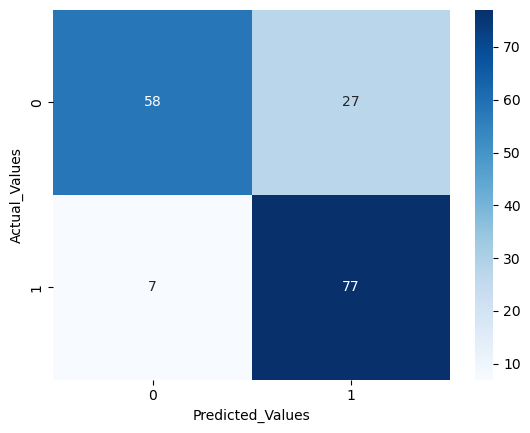

In [46]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
predictions_gb = gb.predict(X_test)

print(classification_report(y_test,predictions_gb))
ax = sns.heatmap(confusion_matrix(y_test,predictions_gb,labels=[0,1]),annot=True,cmap='Blues',xticklabels=[0,1],yticklabels=[0,1])
ax.set(xlabel='Predicted_Values',ylabel='Actual_Values')
plt.show()

              precision    recall  f1-score   support

           0       0.91      0.47      0.62        85
           1       0.64      0.95      0.77        84

    accuracy                           0.71       169
   macro avg       0.77      0.71      0.69       169
weighted avg       0.78      0.71      0.69       169



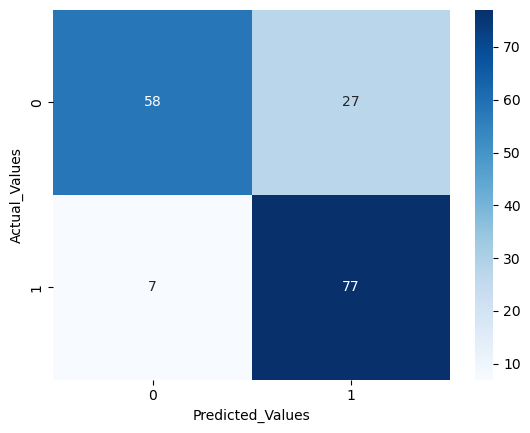

In [48]:
# Linear Discriminant Analysis (LDA)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis ()
lda.fit(X_train,y_train)
predictions_lda = lda.predict(X_test)

print(classification_report(y_test,predictions_lda))
ax = sns.heatmap(confusion_matrix(y_test,predictions_gb,labels=[0,1]),annot=True,cmap='Blues',xticklabels=[0,1],yticklabels=[0,1])
ax.set(xlabel='Predicted_Values',ylabel='Actual_Values')
plt.show()

In [49]:
# Single Neron Model 
import tensorflow as tf
from tensorflow import keras

snm = keras.Sequential([keras.layers.Dense(1,input_dim=21,activation='sigmoid')])
snm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
snm.fit(X_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
85/85 [==============================] - 1s 3ms/step - loss: 0.7107 - accuracy: 0.5896
Epoch 2/100
85/85 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.6207
Epoch 3/100
85/85 [==============================] - 0s 3ms/step - loss: 0.6723 - accuracy: 0.6222
Epoch 4/100
85/85 [==============================] - 0s 3ms/step - loss: 0.6567 - accuracy: 0.6385
Epoch 5/100
85/85 [==============================] - 0s 3ms/step - loss: 0.6427 - accuracy: 0.6430
Epoch 6/100
85/85 [==============================] - 0s 3ms/step - loss: 0.6301 - accuracy: 0.6548
Epoch 7/100
85/85 [==============================] - 0s 3ms/step - loss: 0.6196 - accuracy: 0.6593
Epoch 8/100
85/85 [==============================] - 0s 3ms/step - loss: 0.6097 - accuracy: 0.6681
Epoch 9/100
85/85 [==============================] - 0s 3ms/step - loss: 0.6013 - accuracy: 0.6622
Epoch 10/100
85/85 [==============================] - 0s 3ms/step - loss: 0.5937 - accuracy: 0.6830
Epoch 11/

In [50]:
snm.evaluate(X_test,y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.5339 - accuracy: 0.6864


[0.5338962078094482, 0.6863905191421509]

In [51]:
predicted_snm = np.round(snm.predict(X_test).reshape(-1))

6/6 [==============================] - 0s 4ms/step


In [52]:
pd.DataFrame(predicted_snm).value_counts()

1.0    115
0.0     54
dtype: int64

              precision    recall  f1-score   support

           0       0.80      0.51      0.62        85
           1       0.63      0.87      0.73        84

    accuracy                           0.69       169
   macro avg       0.72      0.69      0.68       169
weighted avg       0.72      0.69      0.68       169



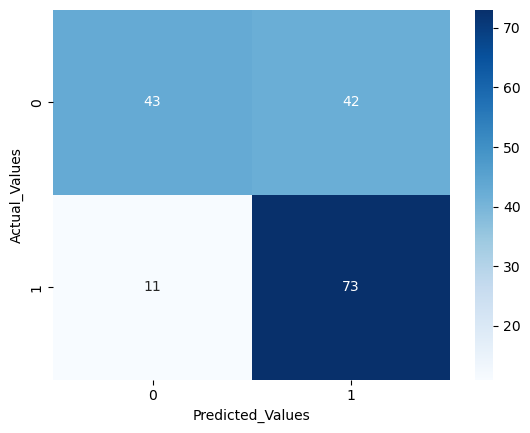

In [53]:
print(classification_report(y_test,predicted_snm))
ax = sns.heatmap(confusion_matrix(y_test,predicted_snm,labels=[0,1]),annot=True,cmap='Blues',xticklabels=[0,1],yticklabels=[0,1])
ax.set(xlabel='Predicted_Values',ylabel='Actual_Values')
plt.show()


              precision    recall  f1-score   support

           0       0.93      0.95      0.94        85
           1       0.95      0.93      0.94        84

    accuracy                           0.94       169
   macro avg       0.94      0.94      0.94       169
weighted avg       0.94      0.94      0.94       169



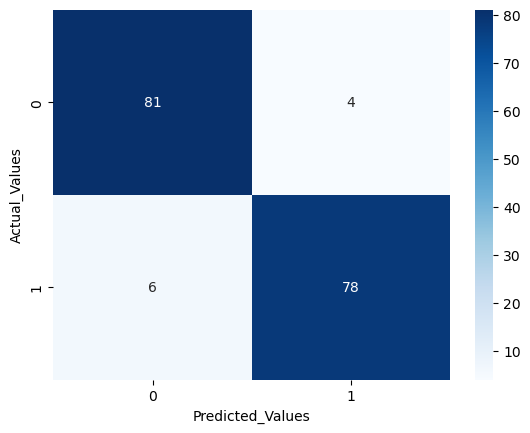

In [47]:
# Voting Ensemble Method (Combining all tree based algorithm)
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

models=[]
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble=VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
predictions_vem = ensemble.predict(X_test)

print(classification_report(y_test,predictions_vem))
ax = sns.heatmap(confusion_matrix(y_test,predictions_vem,labels=[0,1]),annot=True,cmap='Blues',xticklabels=[0,1],yticklabels=[0,1])
ax.set(xlabel='Predicted_Values',ylabel='Actual_Values')
plt.show()

In [55]:
print("Logistic Regreesion:\n")
print(classification_report(y_test,predictions_lr))
print("Bernoulli Naive Bayes:\n")
print(classification_report(y_test,predictions_bnb))
print("Support Vector Machine:\n")
print(classification_report(y_test,predictions_svm))
print("ADA Boost Classifier:\n")
print(classification_report(y_test,predictions_ada))
print("Gradient Boosting Classifier:\n")
print(classification_report(y_test,predictions_gb))
print("Linear Discriminant Analysis:\n")
print(classification_report(y_test,predictions_lda))
print("Single Neuron Network Model:\n")
print(classification_report(y_test,predicted_snm))
print(" Voting Ensemble Method:\n")
print(classification_report(y_test,predictions_vem))

Logistic Regreesion:

              precision    recall  f1-score   support

           0       0.78      0.51      0.61        85
           1       0.63      0.86      0.73        84

    accuracy                           0.68       169
   macro avg       0.71      0.68      0.67       169
weighted avg       0.71      0.68      0.67       169

Bernoulli Naive Bayes:

              precision    recall  f1-score   support

           0       0.88      0.45      0.59        85
           1       0.63      0.94      0.75        84

    accuracy                           0.69       169
   macro avg       0.76      0.69      0.67       169
weighted avg       0.76      0.69      0.67       169

Support Vector Machine:

              precision    recall  f1-score   support

           0       1.00      0.38      0.55        85
           1       0.61      1.00      0.76        84

    accuracy                           0.69       169
   macro avg       0.81      0.69      0.65       169
wei

In [48]:
# Predicting Loan Status for test dataset using the best model obtained above
Tr_predictions = ensemble.predict(test_data)
print(Tr_predictions)

[1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1]


In [49]:
# test data containing predicted loan status 
df_pred = test_data
df_pred['Predicted_Loan_Status'] = Tr_predictions
df_pred

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,Predicted_Loan_Status
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,-0.009454,-0.478949,-0.455469,0.274389,1
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,-0.324878,-0.071242,-0.272093,0.274389,1
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,-0.095349,0.010300,0.667710,0.274389,1
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,-0.412682,0.213066,-0.570079,0.274389,1
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,-0.301019,-0.478949,-0.822221,0.274389,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,-0.213573,0.004048,-0.421086,0.274389,1
363,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,-0.195798,-0.286239,-0.398164,0.274389,1
364,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,-0.304120,0.062758,-0.272093,0.274389,1
365,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,-0.095349,0.171480,0.094659,0.274389,1
